**Srinivas Naidu Pasyavula <br>
QC61851**
<br><br>
Dr. Tony Diana <br>
DATA 690 Introduction to NLP <br>
Homework, Week 3

**DATA Source -** https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data

---

## Mounting Dataset in the Drive

In [2]:
# This code mounts your Google Drive to the Colab notebook, changes the directory to a specific folder on your Drive, and lists the contents of that folder using the ls command.

#!hostname -I
from google.colab import drive
drive.mount('/content/drive')
#
%cd /content/drive/MyDrive/'Colab Notebooks'/'NLP DATA 690 UMBC'/'week3'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/NLP DATA 690 UMBC/week3
'NLP - Week 3.ipynb'   train.tsv


## 1. Loading all the required Libraries and Packages

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 2. Load the dataset and get info about it

In [7]:
# 2. Load the dataset and get info about it
df = pd.read_csv('train.tsv', sep='\t')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


## 3. Count the number of expressed sentiments by category

In [8]:
# 3. Count the number of expressed sentiments by category
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment counts by category:")
print(sentiment_counts)

Sentiment counts by category:
2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


## 4. Provide a histogram of sentiments by category

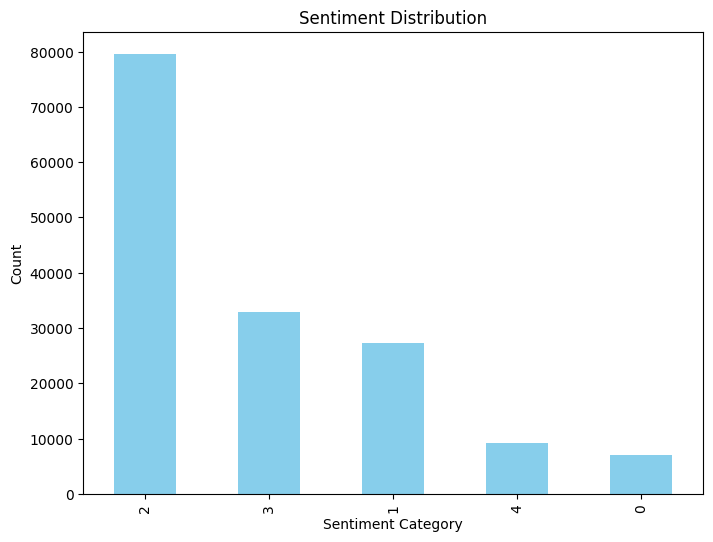

In [9]:
# 4. Provide a histogram of sentiments by category
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

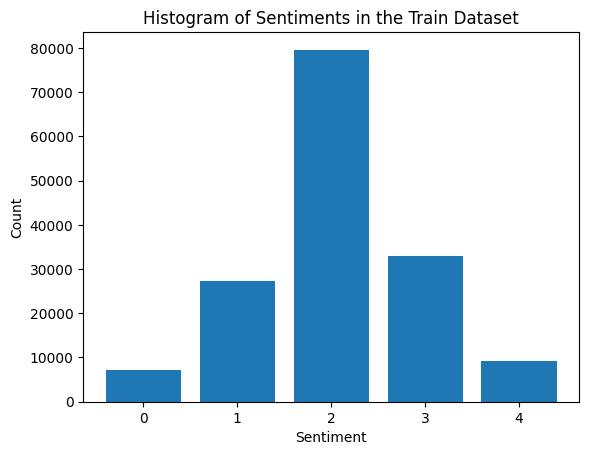

In [21]:
# Get the sentiment counts
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar chart of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Histogram of Sentiments in the Train Dataset")
plt.show()


## 5. Generate a document-term matrix using CountVectorizer

In [10]:
# 5. Generate a document-term matrix using CountVectorizer
count_vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X_count = count_vectorizer.fit_transform(df['Phrase'])

## 6. Split the dataset

In [11]:
# 6. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_count, df['Sentiment'], test_size=0.3, random_state=42)

# 7.1. Create and train a Multinomial Naive Bayes classifier

In [12]:
# 7.1. Create and train a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

## 7.2. Compute the model accuracy

In [13]:
# 7.2. Compute the model accuracy
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy (CountVectorizer): {:.2f}%".format(accuracy * 100))


Model Accuracy (CountVectorizer): 61.12%


# 8. TF-IDF normalization using TfidfVectorizer

In [15]:
# 8. TF-IDF normalization using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
X_tfidf = tfidf_vectorizer.fit_transform(df['Phrase'])

## 9. Split the dataset again for TF-IDF

In [17]:
# 9. Split the dataset again for TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, df['Sentiment'], test_size=0.3, random_state=42)

## 10. Build the Text Classification Model using TF-IDF ;11. Create a Multinomial Naive Bayes classifier for TF-IDF

In [18]:
# 11. Create a Multinomial Naive Bayes classifier for TF-IDF
naive_bayes_classifier_tfidf = MultinomialNB()
naive_bayes_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB()

## 12. Perform prediction on the test set using TF-IDF

In [19]:
# 12. Perform prediction on the test set using TF-IDF
y_pred_tfidf = naive_bayes_classifier_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print("Model Accuracy (TF-IDF): {:.2f}%".format(accuracy_tfidf * 100))

Model Accuracy (TF-IDF): 58.04%
